# Démo d’analyse exploratoire de base

Importez les bibliothèque utilent à l’exploration de données, dont la bibliothèque de dataviz de votre choix :

In [1]:
# votre code ici


Tout d’abord, chargeons les données (créées par  Josh Murrey, [téléchargeables ici](https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings)) :

In [3]:
df = pd.read_csv('data/Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


Faire une analyse exploratoire des données, c’est avant tout comprendre les données. Le mieux pour cela est de répondre à des questions :
- quelles sont les données ? Que représentent-elles ? Comment ont-elles été obtenues ?
- quel est leur type ?
- y a-t-il des données manquantes ? aberrantes ?

Cela permet déjà d’évaluer la qualité des données, de les mettre en forme, de mettre en œuvre des procédure de « nettoyage » (*cleansing*).
Pour cela, il peut être intéresssant de disposer d’informations supplémentaires :
- comment se distribuent-elles ?
- peut-on observer des patterns notables ?
- peut-on quantifier les outliers ?

On pourra ensuite, une fois que l’on connait mieux les données et qu’on a amélioré notre confiance dans les données (après un premier nettoyage) et notre compréhension de celles-ci, poser des questions plus précises quand aux relations entre elles (« explications » ou « effets » du point de vue statistique).

Bien sûr, toutes ces étapes et questions sont interconnectées. Une EDA peut vite devenir « labyrinthique » avec de nombreuses pistes à explorer en paralleles, etc. D’où l’intérêt des notebooks et de les rédiger correctement (clarté, mise en forme, organisation). C’est un processus itératif.

Ne pas oublier qu’a l’origine un client, un service de notre entreprise, un collègue, pose une question. Ici ce pourrait-être : « qu’est-ce qui permet de prédire le nombre de vente d’un livre », ou « quels sont les livres qui générent les plus hauts chiffres d’affaire » ou encore « quels sont les caractéristiques qui font qu’un livre reçoit de bonnes évaluations ? ». C’est alors notre connaissance du métier, notre expérience, notre intuition qui vont nous guider pour . Être data scientist ne se résume pas à connaître des bibliothèques comme Pandas ou Seaborn, dans ce cas un outil comme ydata-profiling ferait un très bon data analyst !

Commençons donc par le début : voyons quelles sont les colonnes, leurs types et s‘il y a des valeurs nulles avec la méthode que vous devez désormais bien connaître…

In [2]:
# votre code ici


Dans un premier temps, essayons de comprendre quelle grandeur ou observable chaque colonne représente. Prenons le temps de lire les labels, de voir à quoi il se rapporte et de repérer les ordres de grandeurs des valeurs numériques et le type des catégories dans les premières lignes du dataframe.

Les années de publication sont codées par des `float64` ce qui est étrange, convertir en `int` ? 
Autre chose, il y a une colonne index qui est totalement inutile (doublon avec l’index du dataframe) et les noms des colonnes ne sont pas formatés de manière homogène (parfois avec des espaces, des majuscules, des soulignés…). Pour faciliter la manipulation des colonnes, homogénéisons tout ça : remplaçons les espaces par des soulignés et supprimons les majuscules. (Dans la doc, cherchez la méthode `.rename()`)

In [3]:
# votre code ici


Que constate-t-on pour une colonne en particulier ?

« votre réponse ici (éditer la cellule) »

Corrigez cela : 

In [6]:
# votre code ici


Supprimons la colonne index :

In [4]:
# votre code ici


Y a-t-il des doublons ? (dans la doc, cherchez les mots clefs `duplicate` ou `duplicated`)

In [5]:
# votre code ici


on peut également vérifier en générant un dataframe où les doublons auraient été supprimés et vérifier s’il comporte le même nombre de lignes

In [6]:
# votre code ici


On a les même dimensions que dans le dataframe original -> pas de doublon.

Et les valeurs manquantes ? (y a-t-il une méthode pour identifier les valeur `na` ?)

In [7]:
# votre code ici


Il y a quelques valeurs manquantes. Mais avant de décider comment on les traite (suppression ? remplacement ? par quelle méthode ?), explorons les valeurs de ces variables de plus près.

### Variables quantitatives (numériques)

Quelle méthode permet d’explorer rapidement les valeurs numériques (ce n’est pas `.info()`, mais l’autre !)

In [8]:
# votre code ici


Cette méthode nous donne une première idée de la distribution des variables numériques, et de leur ordre de grandeur. Regardons attentivement chaque colonne. Pour « comprendre » la répartitions des valeurs dans les différentes colonnes déjà, mais aussi pour repérer ce que l’on percevrait comme des anomalies. Par exemple on constate que l’évaluation (rating) moyenne des livres est assez élevée, autour de 4 sur une échelle de 5 visiblement. Que les nombres de vote pour l’évaluation des livres sont important (de l’ordre de plusieurs dizaines de milliers, jusqu’à plus de 200 000, et jamais moins de 27 000, avec une valeur moyenne un peu en dessous de 100 000). On remarque aussi que la dispersion dans le nombre de livres vendus est énorme (plus de 15 000 pour une moyenne de près de 10 000, et une médiane très décalée par rapport à la moyenne). Etc. 

La valeur minimum pour l’année de publication est négative ! Est-ce que cela vous semble normal, ou aberrant ?


« votre réponse ici » (éditez la cellule)


Il faudra regarder de plus près la distribution des valeurs. Nous verrons cela plus tard. Déjà observons à quoi ressemble la ligne pour laquelle cette année vaut -560 (pensez au boolean indexing) :

In [9]:
# votre code ici


De quel auteur s’agit-il (n’hésitez pas à googler…) ? Est-ce que la valeur pour l’année de publication s’explique alors ?

« votre réponse ici (éditez la cellule) »

Affichez tous les ouvrages pour lesquels l’année de publication est négative :

In [10]:
# votre code ici


On en a quelques uns, essentiellement de l’aire gréco-romaine, mais aussi chinoise (Lao Tzu). On constate par la même occasion qu’on a un problème d’encodage des caractères non-latin, a priori grecs et chinois.

### Variables qualitatives (catégorielles)

Voyons déjà combien y a-t-il de catégories (= valeurs uniques) dans chacune de ces colonnes : 

In [11]:
# votre code ici


Ces données concernent 735 auteurs différents.

Regardons la distribution des différents catégories pour les 4 dernière colonnes qui désignent « réellement » des catégories, c’est à dire un nombre de catégories différentes assez réduit vu le nombre d’enregistrement (les titres des ouvrages et les auteurs ont nécessairement beaucoup de « catégories » / valeurs uniques - est-ce que ce sont vraiment des catégories ?).

Quelles sont les 4 colonnes que vous retenez comme étant réellement des catégories ?

« votre réponse ici (éditez la cellule) »

Affichez les distributions de ces catégories (pour chaque colonne retenue, combien de valeurs différentes/uniques ?) 

In [12]:
# votre code ici


Quels problèmes a-t-on constaté ?

Une 
Données manquantes :
* des livres sans titres (23)
* des codes de langues (53)
* une année de publications 

Valeurs aberrantes :
* au moins une valeur négative pour l’année de publication

Doublons :
* visiblement pas de doublons

Variables catégorielles :
* pour beaucoup de variables catégorielles : langue, éditeur, genre et même l’évaluation des auteurs, il y a de forts déséquilibres entre les catégories en matière d’effectifs

Affichez les valeurs nulles pour les années de publication :

In [13]:
# votre code ici


Affichez les valeurs nulles pour les titres :

In [15]:
# votre code ici


Affichez un *aperçu* (il y a beaucoup de valeurs) des ouvrages dont le code de langue n’est pas renseigné :

In [16]:
# votre code ici


Les valeurs manquantes ne concernent que des variables catégorielles. 
On constate que les livres autres que anglais sont très minoritaires. Le `language_code` risque de n’avoir pas beaucoup de poids dans les analyses.
Par ailleurs, vu que chaque livre a un titre différent, il est peu probable aussi d’observer un effet du titre sur les autres variables – à moins d’étudier très précisément des régularité dans les titres (format, lexique, structure, longueur…) ce qu’on ne va pas faire ici a priori.
Enfin l’année de publication inconnue concerne un seul livre (dont le titre et la langue sont inconnus aussi). L’année par contre peu être une variable importante, mais comme cela ne concerne qu’un livre, cette valeur manquante aura peut d’effet.

On peut être tenté de supprimer les lignes avec valeur manquantes, mais si ça n’affectera que peu les effets des variables concernés, on supprimerait par la même occasion d’autres variables qui elles sont complètes et peuvent être pertinentes pour des analyses futures. La situation est légèrement différente pour l’année manquante.

D’un autre côté analyser des livres qu’on n’est pas capable d’identifier car on n’en connaît pas le titre est un peu étrange. On peut douter de la fiabilité des informations les concernants.

Concernant les livres, vu la majorité de livre en anglais, on peut supposer que les langages non codés sont des livres qui de toute façon auraient été de langue anglaise. Ou alors ils n’ont pas été codés car ils ne correspondaient à aucune langue listée ? Voyons si les patronymes des auteurs peuvent nous aider à décider ? On constate une majorité d’auteur de langue anglaise, sans mention d’un traducteur et le titre en anglais aussi. On peut donc supposer que la première hypothèse est la bonne.

Nous pourrions par exemple décider de :

- supprimer (drop) les livres dont les titres sont manquants, ce qui supprimera par la même occasion la ligne où l’année est manquante

- utiliser une méthode de remplacement implémenter dans pandas qui consiste à remplacer une valeur manquante d’une variable par la valeur de cette variable pour un élément proche (précédent ou suivant dans le dataframe), ce qui revient a dupliquer cette valeur. Cela revient pratiquement a remplir les valeurs manquantes au hasard, avec de bonnes chances de respecter a priori la fréquence d’apparition des valeurs dans l’échantillon, sans trop impacter la moyenne (cf. TCL).

Éliminez les lignes avec valeurs nulles pour les titres (dans la doc cherchez la méthode `.dropna()` :

In [17]:
# votre code ici


Pour les enregistrements sans code de langue, trouvez une méthode de substition. Cherchez la méthode `.ffill()` dans la doc.

In [18]:
# votre code ici


## Distributions

Commençons par la première colonne, `publishing_year`, nous étions déjà intrigué par certaines valeurs que nous y trouvions, il peut être éclairant d’en voir plus précisément la distribution, et si celle-ci justifie un premier tri des données. Utilisons Seaborn qui est un bon compromis entre facilité d’utilisation et lisibilité. N’oublions pas le minimum syndical pour une figure : un titre, et des noms pour les axes, etc.

In [19]:
# votre code ici


On constate que la majeure partie des publications a eu lieu à l’approche des années 2000, avec une progression exponentielle. Voyons ce qu’il se passe à partir du XIXe s. (ici encore le boolean indexing est notre ami) : 

In [20]:
# votre code ici


On constate une augmentation exponentielle du nombre de publications à partir des années 70, après une forte augmentation dès après-guerre.

D’autres distributions peuvent attiser notre curiosité :

* nombre de livres dans chaque genre (on a déjà produit le tableau) :

In [21]:
# votre code ici


* Distribution des notes moyennes des livres, qui est une des variables que l’on pourra chercher à expliquer, ou alors qui servira de variable explicative. Autant voir à quoi elle ressemble :

In [22]:
# votre code ici


* Il n’y a pas que les livres qui sont évalués : les auteurs aussi. Il sont classés en quatre catégories, de débutant (*novice*) à célèbre (*famous*). Voyons la distribution dans les 4 catégories d’auteurs (déjà vu numériquement, mais une data viz est plus parlante) :

In [23]:
# votre code ici
# note : tracer la kde n’a pas beaucoup de sens pour les variables catégorielles

Même s’il s’agit de variables catégorielles, il y a ici une notion d’ordre : novice < intermediate < excellent < famous. Les deux catégories centrale rassemblant 92% des évaluation (cf. chiffres plus haut). Il faudrait donc faire la data viz en ordonnant correctement les catégories (cherchez dans la doc l’argument `order=`:

In [24]:
# votre code ici


On peut se demander dans chaque catégorie, quel est le niveau moyen des notes des livres. On s’attend à une certaine corrélation (les livres les mieux notés étant écrits par des auteurs excellents). Pour comparer les notes moyennes dans chaque catégorie on peut faire un `.groupby()` (appelez l’objet ainsi créé `book_author_ratings`). 

Les méthodes dont vous allez avoir besoin : la méthode qui fourni la grandeur que vous cherchez (`.mean()`, `.count()`… pensez au SQL !), une méthode pour trier.

`.groupby()` retourne quel type d’objet ? Si vous voulez un dataframe, il faudra utiliser les méthodes `.reset_index()` et si vous le souhaitez `.set_index()` (cherchez dans la doc, ou expérimentez) :

In [25]:
# votre code ici


Comparer le type de `book_author_ratings` avec et sans `.reset_index()` :

In [26]:
# votre code ici


Tracez votre figure (la note moyenne par catégorie d’auteur) :

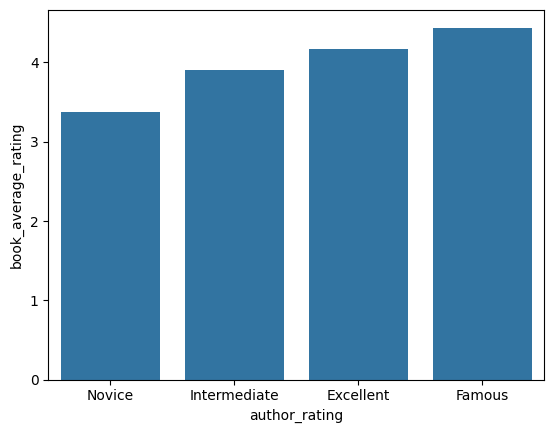

In [29]:
# votre code ici


Sans surprise, plus un auteur est bien noté, plus sa production l’est aussi.

On peut chercher à étudier quelle est la dispersion dans les différentes catégories. Des boxplots peuvent être utiles pour cela (pour faire joli, pensez encore à l’argument `order=`).

In [27]:
# votre code ici


On remarque un phénomène étonnant : le groupe avec la plus grande dispersion est celui des auteurs intermédiaires, ce qui peut s’expliquer par le fait qu’on a énormément d’auteurs dans ce groupe, dont la production peut être sans surprise inégale (ce qui explique leur statut), mais dans le club plus restreint des auteurs célèbres, la dispersion est assez faible (les notes sont très ressérées autour de la médiane) mais cela n’empêche pas la présence d’outliers, et notamment des ouvrages certainement classés comme décevants : être parmi les meilleurs n’interdit pas l’échec, et celui-ci peut être assez cuisant.

Il n’y a pas que les auteurs qui produisent des livres, un autre acteur qui y participe : l’éditeur (*publisher*). Reprenons les mêmes analyses avec les éditeurs. Malheureusement, on n’a pas de catégorisation des éditeurs. Regardons déjà combien y a-t-il d’éditeurs différents, combien de livres sont publiés par éditeurs et éventuellements quels sont ces éditeurs :

In [29]:
# votre code ici (nombre d’éditeurs différents)


Le nombre d’éditeur est finalement assez réduit. On peut donc en tirer la liste :

In [30]:
# votre code ici (liste des éditeurs)


Nous nous rappelons qu’il y avait de forts déséquilibres entre les effectifs des variables catégorielles :

In [32]:
# votre code ici (nombre d’enregistrements / livres pubiés par éditeur)


On peut réaliser une dataviz pour visualiser cela. Comme les noms des éditeurs sont un peu long, mieux vaut les mettre en légende avec un code couleur. On peut aussi faire en sorte que les éditeurs soient ordonnées par ordre décroissant du nombre d’ouvrages publiés :

In [ ]:
# simple way : using .value_counts() to get an ordrered Series (and .reset_index() if you want an ordered dataframe)

 # print(df['publisher'] … your code …)

# complex way (for training) : using .groupby()

#count_ordered_publishers = df.groupby( … your code …

# when categorical labels are long strings, it is better to
# put label in a legend box
fig, ax = plt.subplots()
ax = sns.countplot(data =df, 
                   x='publisher', 
                   hue= 'publisher', 
                   hue_order = count_ordered_publishers, 
                   order=count_ordered_publishers, 
                   ax=ax)
ax.set_xticklabels('')
ax.legend(title='Publisher', 
          labels=count_ordered_publishers,
          loc='upper right', 
          bbox_to_anchor=(1.65, 1.02));

On constate la supériorité écrasante d’Amazon. On constate également qu’un des éditeur a été peut-être réparti entre plusieurs catégories (filiales), assez marginales (n=4). 

On peut directement tracer les boxplots des évaluations pour ces 9 éditeurs. `publisher` est une variable purement catégorielle, mais on peut très bien ordonner les résultats par notes moyennes croissantes des livres (ici avec un `.groupby()` – autant s’entraîner à utiliser ces méthodes) :

In [34]:
# rating_ordered_publishers = df.groupby( … your code …

# fig, ax = … your code …

On pourrait améliorer ces dataviz en faisant en sorte que d’une figure à l’autre le même code couleur soit respecté.

En tout cas, on constate donc que les éditeurs dont les livres reçoivent le plus d’évaluations favorables sont les éditeurs avec un nombre très faible de publications (n=4), ce n’est donc pas représentatif. Hachette group se distingue peut-être en étant, semble-t-il significativement moins bien noté que ses concurents, à vérifier avec des tests statistiques (importantes barres d’erreur).

Enfin une autre variable qui peut jouer un rôle est la langue. Encore une fois il y a une forte disparité du nombre de livres publiés dans chaque catégorie de langue.

D’abord quelles sont ces langues ?

In [35]:
# your code here


Quantifions et visualisons cela :

In [36]:
# your code here 


L’anglais constitue l’écrasante majorité des ouvrages publiés, la langue n’aura donc qu’un effet marginal sur d’autres variables, d’autant que le nombre de livres dans d’autre langues que l’anglais est dérisoire en valeur absolue. Cela n’a strictement aucun sens de mesurer un effet d’une catégorie ne contenant qu’un ou deux livres.

On peut s’intéresser à d’autres éléments pour se construire une meilleure représentation des données et du domaine d’activité :

- comparer les chiffre d’affaires des différents éditeurs, auteurs, genre…
- le nombre de vente de livres (et pas seulement le nombre de livres pubiés) par les différentes catégories d’auteurs, etc.
- etc. à vous de voir !

Pour avoir une vision d’ensemble des interactions entre variables quantitatives et leurs distributions, on peut faire appelle à la méthode `.pairplot()` :

In [38]:
# your code here


Néanmoins, ce n’est pas une bonne idée de regarder systématiquement toutes les analyses et de retenir celles qui semblent montrer quelques chose. Idem lorsque l’on croise variable quantitatives et qualitatives. Si cela permet en effet de repérer des patterns et faire émerger des intuitions, notre démarche devrait être justifiée en reposant sur des hypothèses. 

Par ailleurs, repérer des patterns lorsqu’il y a beaucoup de données et qu’on les confronte de manière systématique n’apporte pas forcément beaucoup de simplicité et de clarté. Dans ce cas procéder pas à pas et regarder en toute conscience chaque variable que l’on met en relation n’est pas inutile, même si plus long. De plus, si on repérerait une relation remarquable, cela ressemblerait à du « cherry picking » (on prend ce qui nous arrange), soutenu par aucune hypothèse, ce qui n’est pas une bonne pratique et ne mène à rien en soi. Néanmoins, il est tout à fait valable d’être surpris par une corrélation qu’on ne soupçonnait pas, et il est tout à fait possible qu’elle nous conduise à des hypothèses fructueuses. Par ailleurs, si on a déjà un certain nombre de poins d’intérêts (on suspecte différentes relations entre variable), on peut gagner du temps en produisant plusieurs visualisation que l’on veut explorer ou tester en une seule ligne de commande. Ce n’est donc pas une option à éliminer, mais on ne peut pas vraiment en faire le cœur de notre méthode de travail.

Ici on peut s’intéresser à différentes relations. La colonne `book_ratings_count`semble montrer un certains nombre de tendances :

- `book_ratings_count` et `sales_rank` semblent très corrélées (logique ! est-ce bien utile ?)
- `book_ratings_count` et `book_average_rating`, on peut comprendre la relation, mais il est intéressant de voir dans quel sens va cette relation
- tant qu’à faire, voir la relation entre `book_ratings_count` et `gross_sales` (chiffre d’affaire généré par chaque livre)
- d’autant que `gross_sales` et `book_ratings_count` sont très corrélées, 
- ce qui nous amène aussi à voir le lien avec les `units_sold` : sur le nombre de livres vendus, combien sont notés ?
- la ligne `units_sold` semble montrer un phénomène particulier, cette variable mérite d’être regardée de plus près, pour comprendre. La variable `sale_price` est certainement liée à d’autres variables…

On peut procéder de même pour les variables catégorielles, ou pour le lien entre variables catégorielles et certaines variables quantitatives.

Dans ce corrigé on ne va pas présenter de manière exhaustive toutes ces explorations, nous vous laissons le soin de le faire, si vous ne l’avais déjà fait durant l’exercice.

Par exemple, commençon à nous intéresser à cette variable `book_ratings_count`, et notamment comment elle est distribuée déjà, s’il y a des outliers : si on considère cette variable comme une variable explicative, voyons comment elle se comporte.


In [40]:
# your code here : distribution


La distribution semble légérement dissymétrique, avec une certaine skewness pour les hautes valeurs : certains livres sont beaucoup notés (certainement les best-sellers, la relation n’est pas linéaire, certains ouvrages raflent tout). 

In [41]:
# your code here : book_ratings_count statistics

On a un rapport de 1 à 10 entre le livre le moins noté (27000) et le livre le plus noté (200000). La moyenne étant un peu en dessous de 100000.

In [44]:
# your code here : show if book_ratings_count has outliers


On constate que les valeurs exceptionnelles concernent les ouvrages qui sont beaucoup plus notés que les autres, comme on avait commencé à le suspecter avec la forme dissymétrique de la distribution. En utilisant une fonction IQR on pourrait les isoler et voir en détail à quoi ils correspondent. (à faire en question bonus)

Pour le moment, intéressons-nous à la relation entre `book_ratings_count` et `book_average_rating`

In [48]:
# your code here : regplot


Qu’obervez vous ? Qu’en pensez vous ? (éditez la cellule pour répondre)

Voyons la relation entre chiffre d’affaire et nombre de livres notés :

In [49]:
# your code here


Qu’obervez vous ? Qu’en pensez vous ? (éditez la cellule pour répondre)

Voyons plutôt la tendance entre note moyenne et chiffre d’affaire : 

In [50]:
# your code here


Qu’obervez vous ? Qu’en pensez vous ? (éditez la cellule pour répondre)

Intéressons nous à la distribution du nombre de livre vendu : 

In [51]:
# your code here


Qu’est-ce qui est frappant dans cette distribution ? (éditez la cellule pour répondre)

On pourra donc chercher à catégoriser les livres entre : grosses ventes / petites ventes par exemple.

Il y a visiblement d’autres variables qui peuvent être traitées de la sorte : on peut éliminer les livres publiés avant une certaine date, on peut regrouper des éditeurs entre eux (sur la base d’hypothèses !), etc. dans l’objectif de créer de nouvelles variables, plus simples (ou plus complexes), qui synthétisent certaines de nos hypothèses ou parti-pris. Cela est aussi une étape de la préparation des données.

Mais avant de créer des modèles pour prédire des observables à partir des autres caractéristiques (des livres), essayez déjà d’isoler les variables qui, selon vous, sont a retenir pour expliquer soit le nombre de livres vendus (`units_sold`), soit le chiffres d’affaire qu’ils génèrent (`gross_sales`), et quelles sont les variables qui n’ont pas leur place dans le modèle.

Nous vérifierons vos choix dans le prochain cours où nous aborderons enfin les modèles de régression.

In [52]:
# à vous de jouer